<h1> Coursera Data Science Project- Car Crash Severity Prediction </h1>

<h2>Introduction: The Problem:</h2>

Car accidents are a huge problem and have been since roughly the beginning of the mass deployment of cars. There are factors which are related to the person at the wheel, such as driving under influence, speeding, stunting or other risky behavior. however then there are also other factors, such as whether conditions, light conditions or even timing (an example is driving at a time where there is a higher percentage of people driving under influence).

Road accidents are social problems- especially devere car accidents which can ruin absolutely ruin a person, their family and as I see it, a critical piece of society. However, severe accidents can probably be reduced significantly, if we were to understand the conditions which make crashing likely more severe. This can help reduce the severity of crashes when they occur, by understanding what conditions make a crash more severe, for example certain weather and road conditions, etc. This information can be given to driving schools, government and private agencies and institutions, which can help develop methods to put what is found into practicality and reduce the rate of severe accidents- so these are key stakeholders in this project. Also another key stakeholder is simply anyone who wants to be safer on the roads and reduce the risk for severe accidents.

So what exactly is the problem? The problem is: there are a lot of crashes in the Seattle area- actually to be more specific, in Washington state, there were over 45,000 car crashes in 2019, and over 200 were fatal. That is a lot!
Now the question to ask is: how can we most effectively reduce the number of severe crashes? I believe it is to understand how these crashes took place and their conditions, so we can help people avoid being in conditions which have a higher likelihood to end in a severe car crash. This is all aimed at drivers in the Seattle area, who are trying to reduce the risk of ending up in a severe car accident and agencies which can help make driving in Seattle safer- this may include a wide range of people, including engineers, city planners, schools, public transport, etc, who could leverage the machile learning model produced in thsi project to develop safer streets. 

To sum it all up, this project is aimed at reducing the amount of severe car crashes, by building a model which will predict whether a car crash will be severe or not given certain conditions and we will also analyze data for additional understanding.


<h2> The Data </h2>

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data I am using is from the Seattle Police Department and consist of over 194,000 records from 2004 to the present. The data contains 37 columns/attributes. A lot of these attributes are not of concern to us for this project, however there are a few key attributes which have a very strong significance.
The import:


In [210]:
df= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


All the atributes/columns and their data types are shown below, however we will be eliminating columns which are of no use to us.

In [211]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [212]:
df.drop(labels= ['SEVERITYCODE', 'X','Y','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','INCDATE','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY', 'INCDTTM'],axis=1, inplace=True)

Below are all the atributes which have value to us:

In [213]:
df.dtypes

OBJECTID           int64
ADDRTYPE          object
SEVERITYCODE.1     int64
VEHCOUNT           int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

Now we will just do some data cleaning and preparation:

In [214]:
df.set_index(keys='OBJECTID', inplace=True)

In [215]:
df.rename(columns={'SEVERITYCODE.1':'SEVERITYCODE'}, inplace=True)

In [216]:
df.head()

,ADDRTYPE,SEVERITYCODE,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR
OBJECTID,,,,,,,,,,,
1,Intersection,2,2,NaN,N,Overcast,Wet,Daylight,NaN,10,N
2,Block,1,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,11,N
3,Block,1,3,NaN,0,Overcast,Dry,Daylight,NaN,32,N
4,Block,1,3,NaN,N,Clear,Dry,Daylight,NaN,23,N
5,Intersection,2,2,NaN,0,Raining,Wet,Daylight,NaN,10,N


In [217]:
df.dtypes

ADDRTYPE          object
SEVERITYCODE       int64
VEHCOUNT           int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

In [218]:
df['INATTENTIONIND'].fillna(value='0', inplace=True)
df['UNDERINFL'].fillna(value='0', inplace=True)
df['SPEEDING'].fillna(value='0', inplace=True)
df['HITPARKEDCAR'].fillna(value='0', inplace=True)
df['ST_COLCODE'].fillna(value='85', inplace=True)

In [219]:
df['INATTENTIONIND'].replace(to_replace='N', value='0', inplace=True)
df['INATTENTIONIND'].replace(to_replace='n', value='0', inplace=True)
df['INATTENTIONIND'].replace(to_replace='Y', value='1', inplace=True)
df['INATTENTIONIND'].replace(to_replace='y', value='1', inplace=True)

In [220]:
df['UNDERINFL'].replace(to_replace='N', value='0', inplace=True)
df['UNDERINFL'].replace(to_replace='n', value='0', inplace=True)
df['UNDERINFL'].replace(to_replace='Y', value='1', inplace=True)
df['UNDERINFL'].replace(to_replace='y', value='1', inplace=True)

In [221]:
df['SPEEDING'].replace(to_replace='N', value='0', inplace=True)
df['SPEEDING'].replace(to_replace='n', value='0', inplace=True)
df['SPEEDING'].replace(to_replace='Y', value='1', inplace=True)
df['SPEEDING'].replace(to_replace='y', value='1', inplace=True)

In [222]:
df['HITPARKEDCAR'].replace(to_replace='N', value='0', inplace=True)
df['HITPARKEDCAR'].replace(to_replace='n', value='0', inplace=True)
df['HITPARKEDCAR'].replace(to_replace='Y', value='1', inplace=True)
df['HITPARKEDCAR'].replace(to_replace='y', value='1', inplace=True)

In [223]:
df['INATTENTIONIND'].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [224]:
df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [225]:
df['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [226]:
df['HITPARKEDCAR'].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

In [227]:
df['SEVERITYCODE'].fillna(value='0', inplace=True)

In [228]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [229]:
df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

<h2> Data Analysis/visualization: </h2>

<h3> Lets visulize each element with regards to volume of accidents and severity of accidents to get a better understanding of what is going on behind the numbers: </h3>

In [230]:
df.dtypes 

ADDRTYPE          object
SEVERITYCODE       int64
VEHCOUNT           int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

In [231]:
sev1= df[df['SEVERITYCODE']== 1]
sev2 = df[df['SEVERITYCODE']==2]

In [232]:
ADDTYPE_VS_SEVERITY1 = sev1['ADDRTYPE'].value_counts()
ADDTYPE_VS_SEVERITY1

Block           96830
Intersection    37251
Alley             669
Name: ADDRTYPE, dtype: int64

In [233]:
ADDTYPE_VS_SEVERITY2 = sev2['ADDRTYPE'].value_counts()

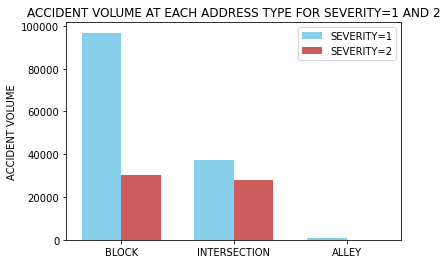

In [234]:
ind = np.arange(len(ADDTYPE_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, ADDTYPE_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, ADDTYPE_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME AT EACH ADDRESS TYPE FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('BLOCK', 'INTERSECTION', 'ALLEY'))
ax.legend()


<h3> As you can see intersections collisions produce the highest proportion of severe crashes! </h3>

In [235]:
INATTENTION_VS_SEVERITY1 = sev1['INATTENTIONIND'].value_counts()
INATTENTION_VS_SEVERITY2 = sev2['INATTENTIONIND'].value_counts()
INATTENTION_VS_SEVERITY1

0    117077
1     19408
Name: INATTENTIONIND, dtype: int64

In [236]:
INATTENTION_VS_SEVERITY2

0    47791
1    10397
Name: INATTENTIONIND, dtype: int64

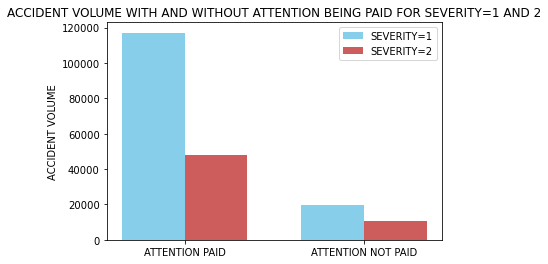

In [237]:
ind = np.arange(len(INATTENTION_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, INATTENTION_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, INATTENTION_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME WITH AND WITHOUT ATTENTION BEING PAID FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('ATTENTION PAID', 'ATTENTION NOT PAID'))
ax.legend()

<h3> Can't really tell if attention being paid will increase or decrese the severity. Lets do some further analysis:</h3>

In [238]:
INATTENTION_VS_SEVERITY2[0]/INATTENTION_VS_SEVERITY1[0]

0.40820144007789744

In [239]:
INATTENTION_VS_SEVERITY2[1]/INATTENTION_VS_SEVERITY1[1]

0.53570692497939

<h3> Now we can see that there is a 10% increase in the probability of having a severe accident if the accident takes place when the driver isn't paying attention. </h3>

In [240]:
UNDERINFL_VS_SEVERITY1 = sev1['UNDERINFL'].value_counts()
UNDERINFL_VS_SEVERITY2 = sev2['UNDERINFL'].value_counts()
UNDERINFL_VS_SEVERITY1

0    130926
1      5559
Name: UNDERINFL, dtype: int64

In [241]:
UNDERINFL_VS_SEVERITY2

0    54626
1     3562
Name: UNDERINFL, dtype: int64

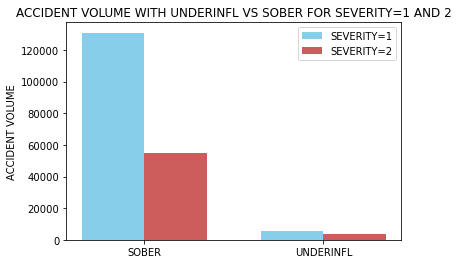

In [242]:
ind = np.arange(len(UNDERINFL_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, UNDERINFL_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, UNDERINFL_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME WITH UNDERINFL VS SOBER FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('SOBER', 'UNDERINFL'))
ax.legend()

<h3> It is clear that driving under the influence will significantly increase the probability of having a severe crash if a crash occurs </h3>

In [243]:
UNDERINFL_VS_SEVERITY2[0]/UNDERINFL_VS_SEVERITY1[0]

0.4172280524876648

In [244]:
UNDERINFL_VS_SEVERITY2[1]/UNDERINFL_VS_SEVERITY1[1]

0.6407627271091924

<h3> Being Under the Influece produces a probability increase of roughly 23% that a crash will be severe! </h3>

In [245]:
WEATHER_VS_SEVERITY1 = sev1['WEATHER'].value_counts().drop(labels=['Unknown','Other'])
WEATHER_VS_SEVERITY2 = sev2['WEATHER'].value_counts().drop(labels=['Unknown', 'Other'])
WEATHER_VS_SEVERITY1

Clear                       75295
Raining                     21969
Overcast                    18969
Snowing                       736
Fog/Smog/Smoke                382
Sleet/Hail/Freezing Rain       85
Blowing Sand/Dirt              41
Severe Crosswind               18
Partly Cloudy                   2
Name: WEATHER, dtype: int64

In [246]:
WEATHER_VS_SEVERITY2

Clear                       35840
Raining                     11176
Overcast                     8745
Fog/Smog/Smoke                187
Snowing                       171
Sleet/Hail/Freezing Rain       28
Blowing Sand/Dirt              15
Severe Crosswind                7
Partly Cloudy                   3
Name: WEATHER, dtype: int64

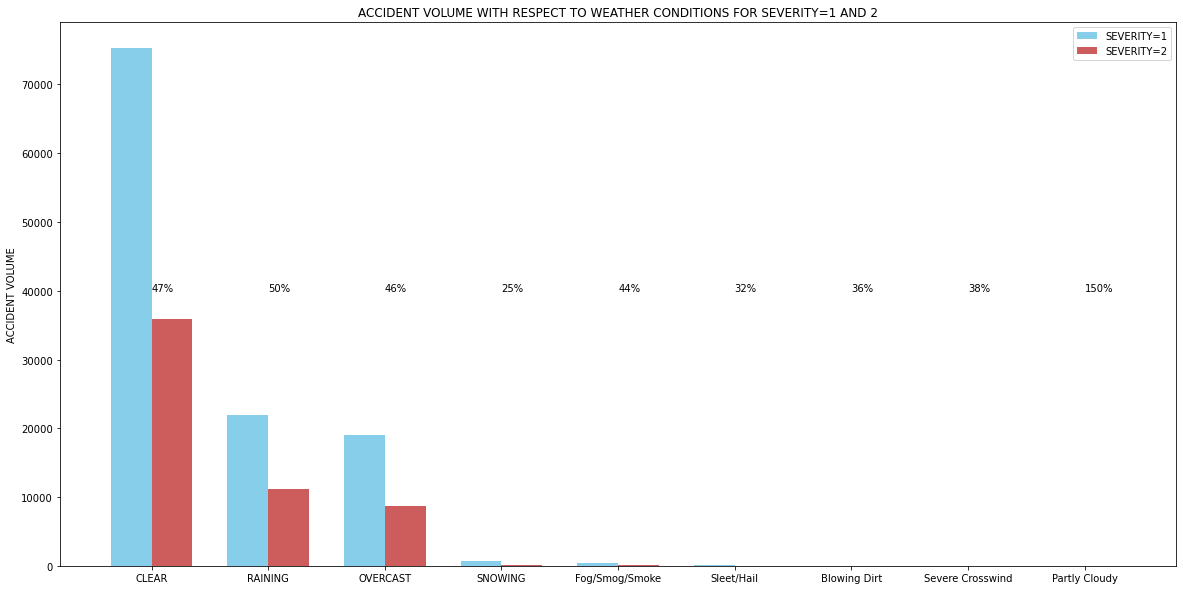

In [247]:
ind = np.arange(len(WEATHER_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind - width/2, WEATHER_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, WEATHER_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME WITH RESPECT TO WEATHER CONDITIONS FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('CLEAR', 'RAINING', 'OVERCAST', 'SNOWING','Fog/Smog/Smoke', 'Sleet/Hail', 'Blowing Dirt', 'Severe Crosswind', 'Partly Cloudy'))
ax.legend()

for i in range(9):
    annotate_value = str(int((WEATHER_VS_SEVERITY2[i]/WEATHER_VS_SEVERITY1[i])*100)) +"%"
    ax.annotate(text=annotate_value,xy=(ind[i],40000))

<h4> The percentages represent the ratio between severe and non-severe accidents. Not the percentage of severe accidents out of the total volume of accidents. You can see that infact clear skies have one of the highest ratio of severe accidents, while snowing actually has only 25%- this is surprising! But there is no surprise that Raining skies auses the greatest amount of severe crashes. We will ignorre partly cloudy's 150% as this section has too little data to have a proper representation.</h4>


In [248]:
ROADCOND_VS_SEVERITY1 = sev1['ROADCOND'].value_counts().drop(labels=['Unknown','Other'])
ROADCOND_VS_SEVERITY2 = sev2['ROADCOND'].value_counts().drop(labels=['Unknown', 'Other'])
ROADCOND_VS_SEVERITY1

Dry               84446
Wet               31719
Ice                 936
Snow/Slush          837
Standing Water       85
Sand/Mud/Dirt        52
Oil                  40
Name: ROADCOND, dtype: int64

In [249]:
ROADCOND_VS_SEVERITY2

Dry               40064
Wet               15755
Ice                 273
Snow/Slush          167
Standing Water       30
Oil                  24
Sand/Mud/Dirt        23
Name: ROADCOND, dtype: int64

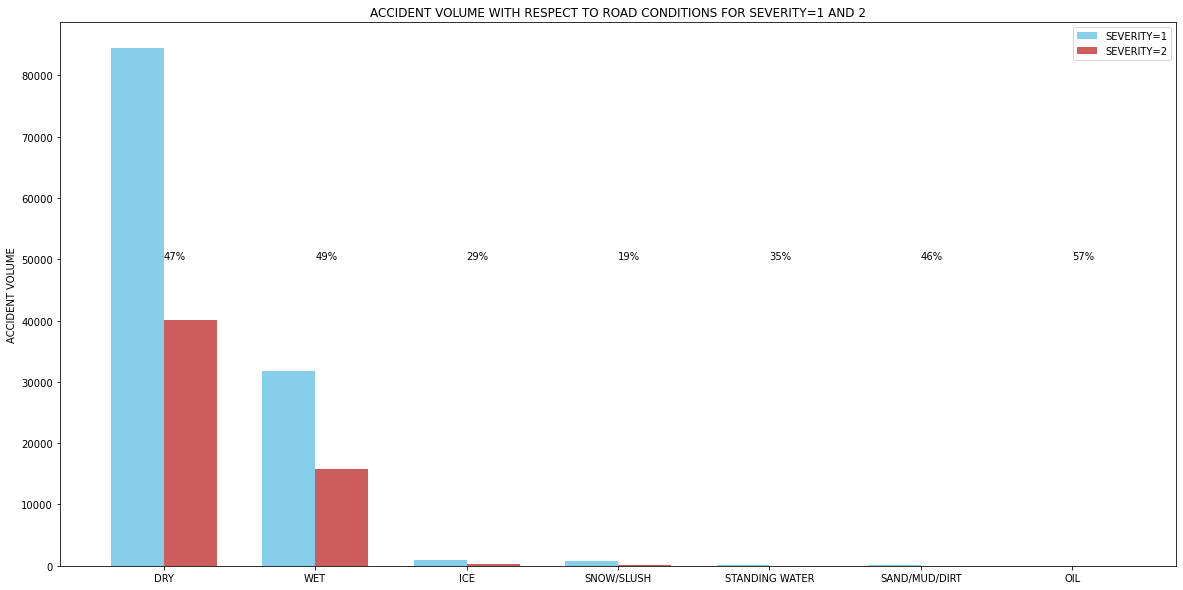

In [250]:
ind = np.arange(len(ROADCOND_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind - width/2, ROADCOND_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, ROADCOND_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME WITH RESPECT TO ROAD CONDITIONS FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('DRY', 'WET', 'ICE', 'SNOW/SLUSH','STANDING WATER', 'SAND/MUD/DIRT', 'OIL'))
ax.legend()

for i in range(7):
    annotate_value = str(int((ROADCOND_VS_SEVERITY2[i]/ROADCOND_VS_SEVERITY1[i])*100)) +"%"
    ax.annotate(text=annotate_value,xy=(ind[i],50000))

<h3> No Surprises! </h3>

In [251]:
LIGHTCOND_VS_SEVERITY1 = sev1['LIGHTCOND'].value_counts().drop(labels=['Dark - Unknown Lighting', 'Other', 'Unknown'])
LIGHTCOND_VS_SEVERITY2 = sev2['LIGHTCOND'].value_counts().drop(labels=['Dark - Unknown Lighting','Other', 'Unknown'])
LIGHTCOND_VS_SEVERITY1

Daylight                    77593
Dark - Street Lights On     34032
Dusk                         3958
Dawn                         1678
Dark - No Street Lights      1203
Dark - Street Lights Off      883
Name: LIGHTCOND, dtype: int64

In [252]:
LIGHTCOND_VS_SEVERITY2

Daylight                    38544
Dark - Street Lights On     14475
Dusk                         1944
Dawn                          824
Dark - No Street Lights       334
Dark - Street Lights Off      316
Name: LIGHTCOND, dtype: int64

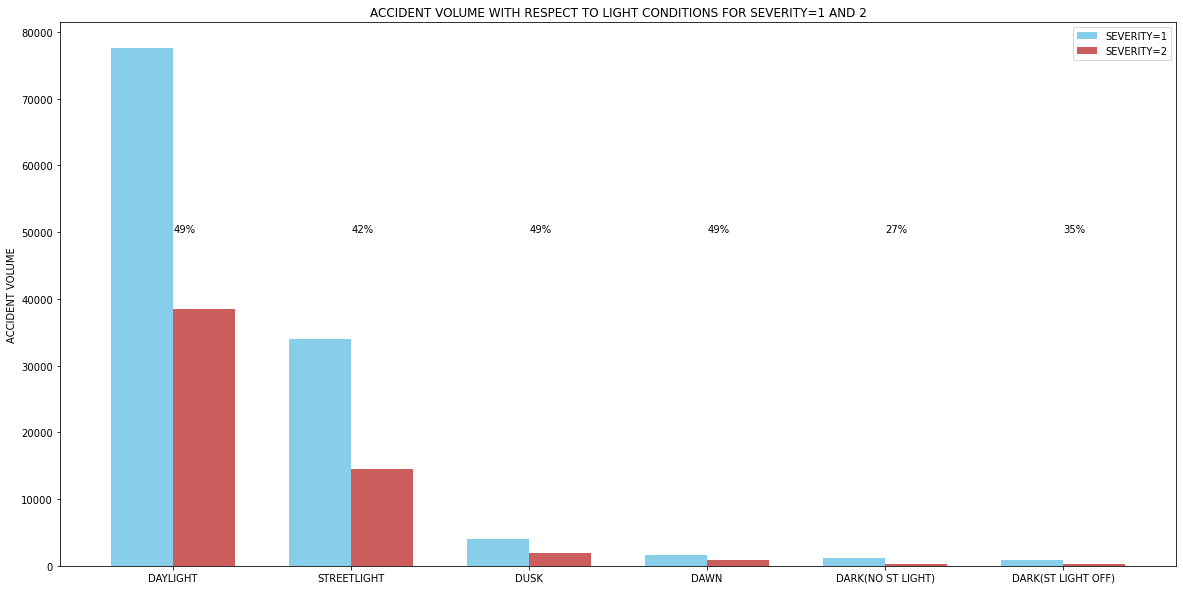

In [253]:
ind = np.arange(len(LIGHTCOND_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind - width/2, LIGHTCOND_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, LIGHTCOND_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME WITH RESPECT TO LIGHT CONDITIONS FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('DAYLIGHT', 'STREETLIGHT', 'DUSK', 'DAWN','DARK(NO ST LIGHT)', 'DARK(ST LIGHT OFF)'))
ax.legend()

for i in range(6):
    annotate_value = str(int((LIGHTCOND_VS_SEVERITY2[i]/LIGHTCOND_VS_SEVERITY1[i])*100)) +"%"
    ax.annotate(text=annotate_value,xy=(ind[i],50000))

<h3> Dusk and Dawn and Daylight have the highest ratio of severe crashes </h3>

In [254]:
SPEEDING_VS_SEVERITY1 = sev1['SPEEDING'].value_counts()
SPEEDING_VS_SEVERITY2 = sev2['SPEEDING'].value_counts()
SPEEDING_VS_SEVERITY1

0    130683
1      5802
Name: SPEEDING, dtype: int64

In [255]:
SPEEDING_VS_SEVERITY2

0    54657
1     3531
Name: SPEEDING, dtype: int64

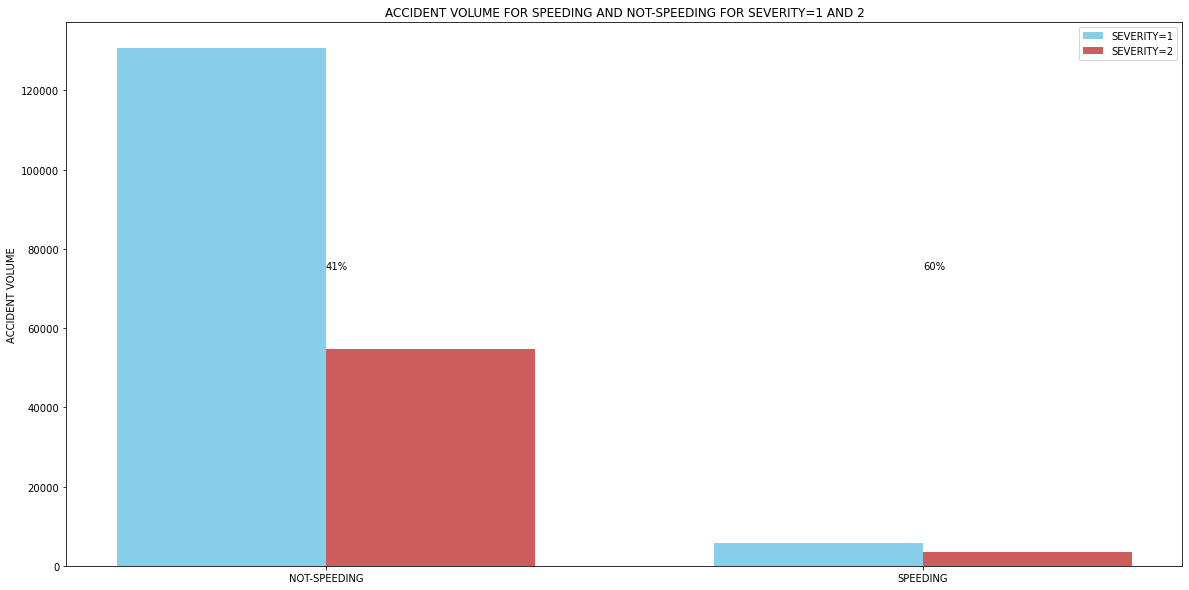

In [256]:
ind = np.arange(len(SPEEDING_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind - width/2, SPEEDING_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, SPEEDING_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME FOR SPEEDING AND NOT-SPEEDING FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('NOT-SPEEDING', 'SPEEDING'))
ax.legend()

for i in range(2):
    annotate_value = str(int((SPEEDING_VS_SEVERITY2[i]/SPEEDING_VS_SEVERITY1[i])*100)) +"%"
    ax.annotate(text=annotate_value,xy=(ind[i],75000))

<h3> Crashes which take place while speeding are much more likely to result in severe injury </h3>

In [257]:
HITPARKEDCAR_VS_SEVERITY1 = sev1['HITPARKEDCAR'].value_counts()
HITPARKEDCAR_VS_SEVERITY2 = sev2['HITPARKEDCAR'].value_counts()
HITPARKEDCAR_VS_SEVERITY1

0    129717
1      6768
Name: HITPARKEDCAR, dtype: int64

In [258]:
HITPARKEDCAR_VS_SEVERITY2

0    57740
1      448
Name: HITPARKEDCAR, dtype: int64

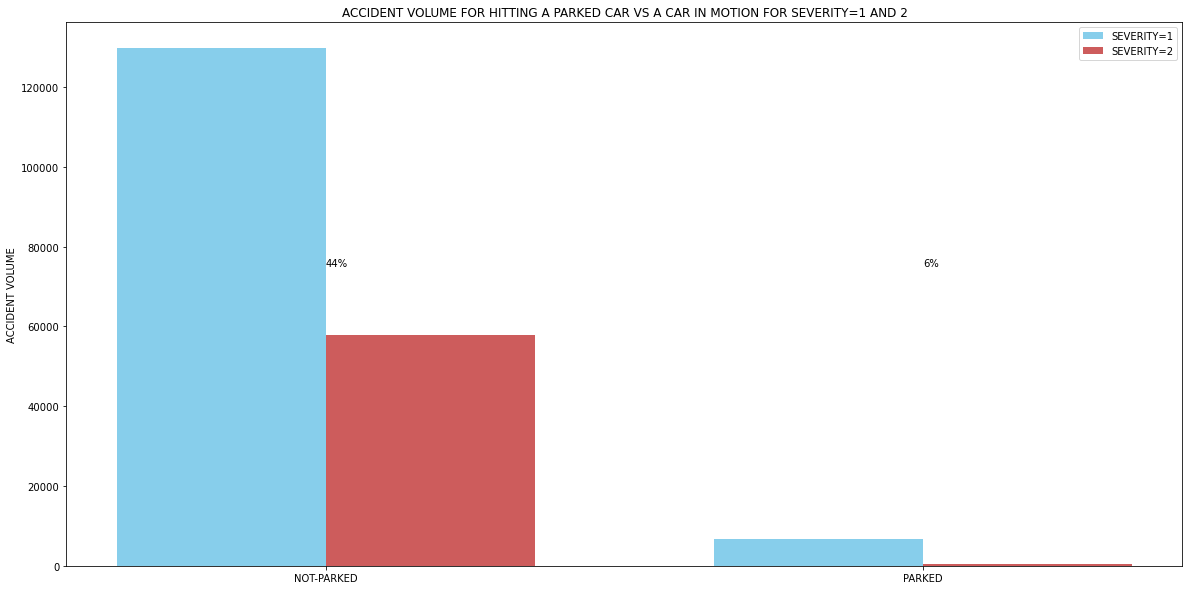

In [259]:
ind = np.arange(len(HITPARKEDCAR_VS_SEVERITY1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind - width/2, HITPARKEDCAR_VS_SEVERITY1, width,
                color='SkyBlue', label='SEVERITY=1')
rects2 = ax.bar(ind + width/2, HITPARKEDCAR_VS_SEVERITY2, width,
                color='IndianRed', label='SEVERITY=2')


ax.set_ylabel('ACCIDENT VOLUME')
ax.set_title('ACCIDENT VOLUME FOR HITTING A PARKED CAR VS A CAR IN MOTION FOR SEVERITY=1 AND 2')
ax.set_xticks(ind)
ax.set_xticklabels(('NOT-PARKED', 'PARKED'))
ax.legend()

for i in range(2):
    annotate_value = str(int((HITPARKEDCAR_VS_SEVERITY2[i]/HITPARKEDCAR_VS_SEVERITY1[i])*100)) +"%"
    ax.annotate(text=annotate_value,xy=(ind[i],75000))

Clearly hitting a parked car has a much lower probability for an accident to be severe.

<h2> Methodology </h2>

Now we will construct a model which will take the factors we have analyzed into it to create a predictive model to predict the severity of a car crash from the input. We will first need to process the data abit in order to make it right for the model to accept and to create a split between training data and test data. Then we will be able to evaluate the data to make sure that we have highly accurate model that we can then deploy and work with to make Seattle a safer city. 

We will be using a Classification machine learning model, as we have 2 categories: 1- non-severe  2-Severe. This means that we want a model which will predict whether an accident is severe or non severe, so a classification model is what we are looking for. 

Also we need to keep in mind that we are dealing with almost 200,000 data points, and quite a few columns of data, thus, with such huge amounts of data we will need a model which can run relatively fast, as else, it will takre a long time computing and this will be rather annoying for anyone working with the model. Furrthermore, stakeholders who will be using this model may not always want to input every atribute of the independent variable (and in this case, wee will want them to put in a 0, or false value for the component that they are not calculating for), so thus this model needs to be clearly split in a way which doesn't mitigate the values based on a lack of certain test components. 
For these reason, we will choose a Support Vector Machine Model, as it fits exactly the description of what we need.

<h2> Model Building: </h2>

A little bit of data processing:

In [260]:
from sklearn import preprocessing

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X= df[['ADDRTYPE','VEHCOUNT','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR']]

In [263]:
X= pd.concat([X,pd.get_dummies(df['ADDRTYPE'])], axis=1)
X= pd.concat([X,pd.get_dummies(df['WEATHER'])], axis=1)
X= pd.concat([X,pd.get_dummies(df['ROADCOND'])], axis=1)
X= pd.concat([X,pd.get_dummies(df['LIGHTCOND'])], axis=1)
X.drop(labels=['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1, inplace=True)

In [264]:
X.drop(labels=['Dark - Unknown Lighting', 'Other', 'Unknown'], axis=1, inplace=True)

In [265]:
X['INATTENTIONIND']= X['INATTENTIONIND'].astype(int)
X['UNDERINFL']= X['UNDERINFL'].astype(int)
X['SPEEDING']= X['SPEEDING'].astype(int)
X['HITPARKEDCAR']= X['HITPARKEDCAR'].astype(int)

In [266]:
X.head()

,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,HITPARKEDCAR,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,...,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [267]:
X= preprocessing.StandardScaler().fit(X).transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [268]:
Y= df['SEVERITYCODE']

In [269]:
#data reduction
X_TRAIN, X_DISCARD, Y_TRAIN, Y_DISCARD= train_test_split(X,Y, test_size=0.8, random_state=100)

In [270]:
x_train, x_test, y_train, y_test= train_test_split(X_TRAIN, Y_TRAIN, test_size=0.5, random_state= 50) 

<h2> This will be a Support vector Machine Model </h2>

In [271]:
from sklearn import svm

In [272]:
from sklearn import metrics

In [273]:
from sklearn.metrics import jaccard_similarity_score, f1_score

<h1> The Model: </h1>

In [274]:
SMachine = svm.SVC(kernel='rbf')

In [275]:
SMachine.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<h2> Evaluation: </h2>

We will use The Jaccard similarity Score and the f1 score to assess how well the model predicted whether an accident was severe or not. The evaluation types use the models' predictions and compares them to their real values. We have a certain amount of data we allocated only for testing and evaluating and is completely random and real data, which was separated from the data provided by the Seattle Police Department before the model was actually built.

In [276]:
svmhat = SMachine.predict(x_test)

In [277]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [278]:
JS= jaccard_similarity_score(y_test, svmhat)
F1_score = f1_score(y_test, svmhat, average='weighted')

In [279]:
print("Jaccards Score is:",JS)
print("f1 score is: ", F1_score)

Jaccards Score is: 0.7271279601376689
f1 score is:  0.6661369923323646


<h2> Lets also run a decisions Tree model for comparison: </h2>

In [282]:
from sklearn.tree import DecisionTreeClassifier

In [283]:
Tree = DecisionTreeClassifier(criterion='entropy')

In [284]:
Tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [285]:
predTree= Tree.predict(x_test)

In [286]:
F1_Tree= f1_score(y_test, predTree, average='weighted')
JS_Tree= jaccard_similarity_score(y_test, predTree)

In [287]:
print('f1 score is: ', F1_Tree)
print('Jaccard Score is: ', JS_Tree)

f1 score is:  0.6720137537024747
Jaccard Score is:  0.7211691580623619


<h2> Logistic Regression Model: </h2>

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
LRModel = LogisticRegression(C=0.01, solver='liblinear')
LRModel.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [291]:
LRhat= LRModel.predict(x_test)

In [293]:
JS_LOG = jaccard_similarity_score(LRhat, y_test)
F1_LOG = f1_score(y_test, LRhat, average='weighted')

In [295]:
print("JS is: ", JS_LOG)
print("F1 score is: ", F1_LOG)

JS is:  0.7128987517337032
F1 score is:  0.6402708523705322


<h3> So The Decisions Tree and SVM have almost identical results, however logistic Regression model is slightly behind. KNN model was excluded as it takes too long to produce with such large amounts of data. </h3>

<h1> Results and Discussion: </h1>

There are quite a few factors which can help us determine whther a car was in a severe car crash or not. Lets look at the figures:
1- We found that car crashes which involve a parked car are highly unlikely to produce severe accidents. 
2.Speeding produces a significant increase in likelihood of an accident being severe.
3. Being under the influence also heavily increases the likelihood of having a severe accident.
4.When attention isnt being paid the liklihood of severity also increases. 
5.Accidents in intersections have a very high likelihood of being severe, while accidents in alleys have a very low likelihood. The most accidents happen on blocks, which have a moderate likelihood of having a severe accident.
6. Raining weather has the worst probability for severity of accidents, and clear, overcast and foggy conditions are close behind- they all produce roughly a 1/3 probability that an accident will be severe. All other conditions are far lower.
7.Wet then dry road conditions produce the 2 highest probability of severe accidents, once again a roughly 1/3 chance of an accident to be severe, while all other road conditions are much lower.
8. With regards to light conditions, it turns out that dark conditions are actually better in respect to a reduction in severe crashes- when there were no street lights at all we had the lowest proportion of accidents being severe, then when the street lights were turned off. More on, Dusk, Dawn and Daylight are all tied in first place for producing the highest likelihood of an accident to be severe and then streetlights is close behind in second place- in these conditions an accident has roughly a 1/3 chance of being severe. Perhaps if Seattle was a darker city, it would be safer.

<h1> Conclusion: </h1>

The purpose of this project is to 1.Understand the factors which produce a higher likelihood of a crash being severe and 2. to build a model which can predict the sverity of a crash based on factors of input. We have been able to successfully determine conditions which lead to a higher likelihood of a severe crash and build a model which is ready to deploy to estimate the severity of a crash giving a litany of conditions. The model doesn't have the best accuracy to be honest, however due to the nature of a car crash being based on so many factors and involving alot of luck, this can be expected. However, the model's accuracy is still high enough to help increase safety substantially. There were also some surprises found in the data analysis, which are a good thing, as they differ from what we might have expected prior to the analysis, such as the fact that darker light conditions actually produce a lower probability of an accident being severe. These are valuable insights for constructing safer cities. More on, the model can be deployed for scenario evaluation, to determine which parts of a city or design of a city will produce severe accidents in differnt conditions. The Log loss model, could even be deployed to predict the probability of having a sever crash- these models could be very useful for building safer roads in the future and producing better drivers and allowing stakeholders to find conditions and points of danger so they can be more aware and thus pay more attention to these points of interest.